# Clustering (K-means）+ Stability check

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [ ]:
# read data from csv
clean_ling_data = pd.read_csv('../data/ling_data.csv')
clean_lingloc = pd.read_csv('../data/clean_lingloc.csv')
pcadata = pd.read_csv('../data/pcadata.csv')

In [ ]:
X = pcadata.iloc[:, :47]

#### KMeans clustering using 3 clusters

In [ ]:
# Perform KMeans clustering using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Evaluate the clustering results
labels = kmeans.labels_
# Post-process the cluster labels
clustered_elbow_data = pd.DataFrame(X, columns=X.columns)
clustered_elbow_data['Cluster'] = labels + 1  # Offset cluster labels to start from 1
clustered_elbow_data['Latitude'] = clean_ling_data['lat']
clustered_elbow_data['Longitude'] = clean_ling_data['long']

In [ ]:
fig = px.scatter_mapbox(clustered_elbow_data, lat='Latitude', lon='Longitude', width=850, height=700,
                        color='Cluster', color_discrete_map='viridis',
                            mapbox_style="open-street-map",
                            title="Survey Responses on a Map in North America",
                            center={"lat": 45, "lon": -100}, # Set the map center to the general area of North America
                            zoom=3)  # Set the initial zoom level

fig.show()

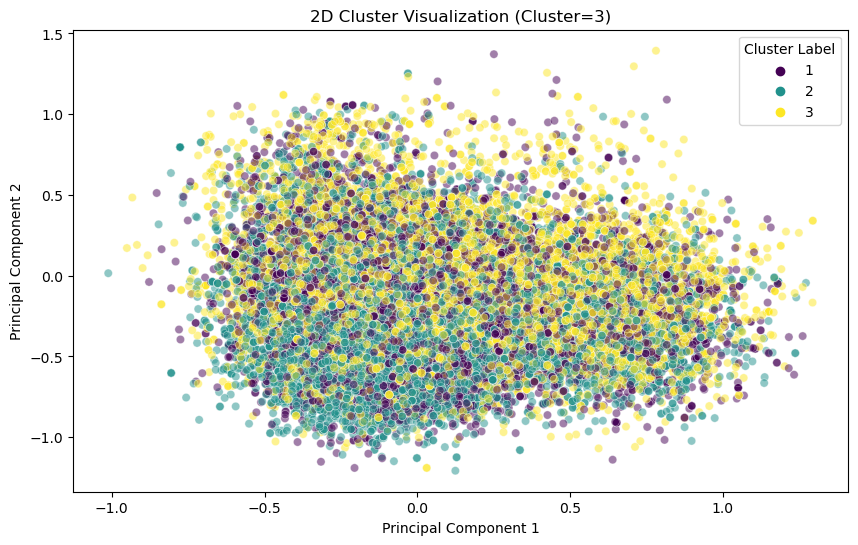

In [ ]:
# Create a scatter plot of the PCA result, coloring by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data = clustered_elbow_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.5)
plt.title('2D Cluster Visualization (Cluster=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label')

plt.show()

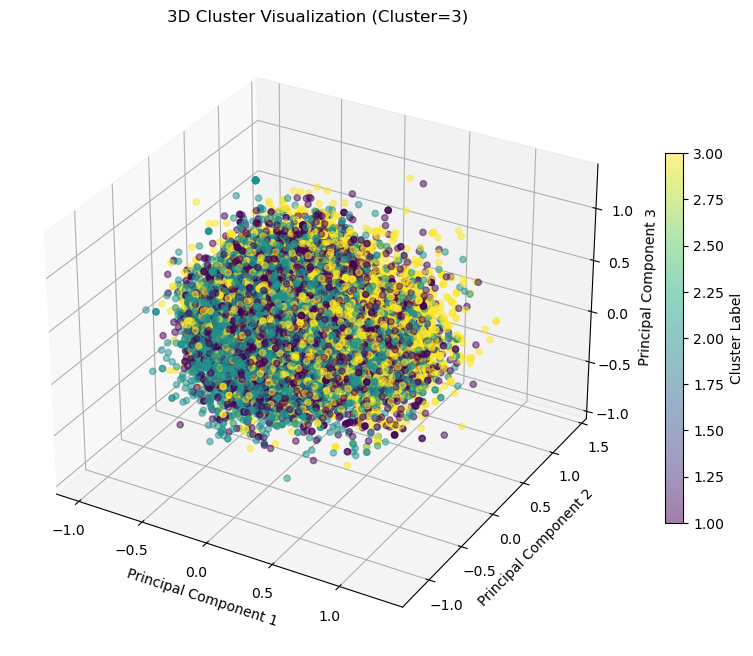

In [ ]:
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(clustered_elbow_data['PC1'], clustered_elbow_data['PC2'], clustered_elbow_data['PC3'],
                     c=clustered_elbow_data['Cluster'], cmap='viridis', alpha=0.5, marker='o')

# Set the titles and labels
ax.set_title('3D Cluster Visualization (Cluster=3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Cluster Label')


# Show the plot
plt.show()

#### Silhouette Score

In [ ]:
silhouette_coeffs = []  # To store silhouette coefficient for each k
for i in range(2, 20):  # The range of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coeffs.append(score)

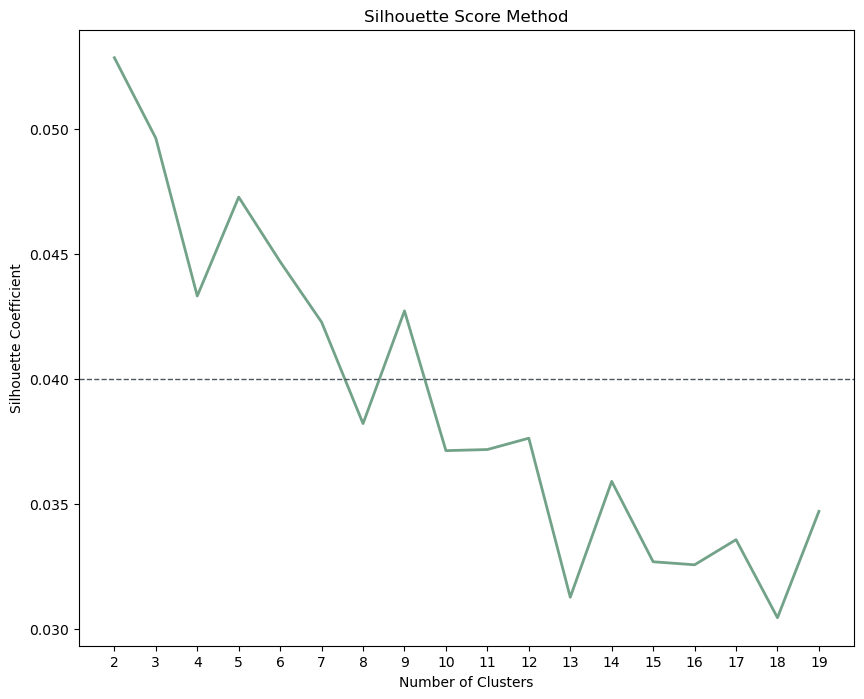

In [ ]:
# Plotting the Silhouette Score
plt.figure(figsize=(10, 8))
plt.plot(range(2, 20), silhouette_coeffs, color='#72A288', linewidth=2)
plt.xticks(range(2, 20))
plt.axhline(0.04, color='#4B5760', linestyle='--', linewidth=1)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Evaluate the clustering results
labels = kmeans.labels_
# Post-process the cluster labels
clustered_score_data = pd.DataFrame(X, columns=X.columns)
clustered_score_data['Cluster'] = labels + 1  # Offset cluster labels to start from 1
clustered_score_data['Latitude'] = clean_ling_data['lat']
clustered_score_data['Longitude'] = clean_ling_data['long']
print(clustered_score_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.173995 -0.333868 -0.320387 -0.252342 -0.074761  0.666812  0.204604   
1  0.219752  0.004932  0.286128 -0.057200 -0.363277 -0.764178  0.358190   
2 -0.031835  0.055150  0.316119  0.067760 -0.984960 -0.371432  0.310982   
3 -0.284307 -0.200557  0.572837  0.021885 -0.425297 -0.467187 -0.193866   
4 -0.266415  0.404742  0.416016  0.149584 -0.212001 -0.405799 -0.048427   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.029095 -0.150490  0.039195 -0.027193  0.384249  0.137345  0.789059   
1  0.686461 -0.530625 -0.567179  0.578088  0.567565  0.109550 -0.149270   
2  0.244445 -0.687474 -0.755733  0.132186  0.157788 -0.095393  0.105432   
3 -0.181947 -0.390715 -0.030846  0.823614  0.133196  0.408944  0.243363   
4  0.144182 -0.362279 -0.255297 -0.053754  0.631308 -0.080691  0.147754   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.067082  0.558156 -

In [ ]:
print(clustered_score_data.shape)

(47471, 50)


In [ ]:
fig = px.scatter_mapbox(clustered_score_data, lat='Latitude', lon='Longitude', color='Cluster',width=850, height=700,
                            mapbox_style="open-street-map",
                            title="Clustering on a Map in North America",
                            center={"lat": 45, "lon": -100}, # Set the map center to the general area of North America
                            zoom=3)  # Set the initial zoom level

fig.show()

#### Use CV to pick k

In [ ]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,-0.173995,-0.333868,-0.320387,-0.252342,-0.074761,0.666812,0.204604,-0.029095,-0.150490,0.039195,-0.027193,0.384249,0.137345,0.789059,0.067082,0.558156,-0.752867,-0.156228,-0.103061,-0.174990,-0.205427,0.113235,-0.217673,0.224975,-0.088142,0.731761,-0.073891,0.266606,-0.182787,0.172073,0.311244,-0.126413,-0.006982,0.010272,0.219359,-0.462114,-0.773539,-0.120365,-0.096122,0.173910,-0.251021,-0.060961,0.189197,0.008845,-0.022872,0.207001,0.408974
1,0.219752,0.004932,0.286128,-0.057200,-0.363277,-0.764178,0.358190,0.686461,-0.530625,-0.567179,0.578088,0.567565,0.109550,-0.149270,0.986510,0.125927,-0.508481,0.064093,0.502136,0.167520,-0.659122,-0.170755,-0.225978,-0.129675,0.350443,-0.122691,-0.212190,-0.030293,-0.464260,0.206412,-0.185830,-0.598589,-0.111286,0.498816,0.008680,0.299136,-0.365441,0.299116,-0.286999,0.557436,-0.379743,-0.268900,-0.187125,-0.288846,-0.069247,-0.110790,0.427918
2,-0.031835,0.055150,0.316119,0.067760,-0.984960,-0.371432,0.310982,0.244445,-0.687474,-0.755733,0.132186,0.157788,-0.095393,0.105432,0.205072,0.112427,-0.409352,-0.383439,-0.098619,0.444644,-0.548693,-0.425503,0.297192,-0.225585,0.073956,-0.049197,-0.431503,-0.144035,0.094733,0.104953,-0.209628,0.291131,0.054358,1.055514,-0.085861,-0.049319,-0.322193,0.006053,-0.489312,0.520817,-0.050514,-0.348791,-0.545895,0.287996,0.284458,0.413455,0.735579
3,-0.284307,-0.200557,0.572837,0.021885,-0.425297,-0.467187,-0.193866,-0.181947,-0.390715,-0.030846,0.823614,0.133196,0.408944,0.243363,0.762130,0.142413,-0.918593,0.479148,0.582722,-0.061173,-0.277181,0.021176,-0.332647,-0.178502,-0.592861,0.473549,-0.464091,-0.163680,0.422402,-0.149045,0.112903,0.448179,-0.089071,0.532186,-0.082432,0.274800,-0.288971,-0.251808,-0.431989,0.616460,-0.079875,-0.502932,-0.256408,0.191815,-0.130327,0.135551,0.560638
4,-0.266415,0.404742,0.416016,0.149584,-0.212001,-0.405799,-0.048427,0.144182,-0.362279,-0.255297,-0.053754,0.631308,-0.080691,0.147754,0.356457,-0.029723,-0.322168,-0.269685,-0.004078,0.092440,-0.933440,-0.499391,-0.039009,0.037598,0.130487,0.001548,-0.058986,-0.145205,-0.124895,-0.018238,-0.548010,-0.315717,0.201059,0.076671,-0.468994,-0.053151,-0.605615,0.037391,-0.476464,0.512507,0.719346,-0.512635,-0.116603,-0.036838,0.014074,-0.004171,0.589724


In [ ]:
def kfold_silhouette(data, n_clusters_range, n_splits=5):
    silhouette_avg_scores = []

    for n_clusters in n_clusters_range:
        kfold_silhouette_scores = []
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(data):
            # Split data
            X_train, X_test = data.iloc[train_index], data.iloc[test_index]

            # Compute clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(X_train)
            cluster_labels = kmeans.predict(X_test)

            # Compute the silhouette score
            silhouette_avg = silhouette_score(X_test, cluster_labels)
            kfold_silhouette_scores.append(silhouette_avg)

        # Average silhouette score for this n_clusters
        avg_score = np.mean(kfold_silhouette_scores)
        silhouette_avg_scores.append(avg_score)

    return silhouette_avg_scores

n_clusters_range = range(2, 21)  # Cluster numbers to test
n_splits = 5  # Number of folds for cross-validation

scores = kfold_silhouette(X, n_clusters_range, n_splits)

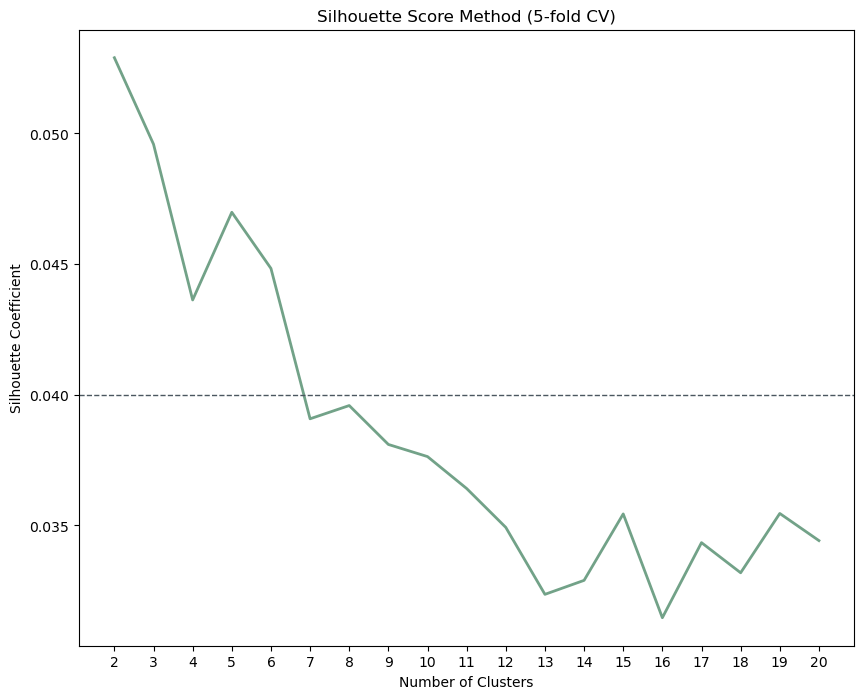

In [ ]:
# Plotting the Silhouette Score
plt.figure(figsize=(10, 8))
plt.plot(range(2, 21), scores, color='#72A288', linewidth=2)
plt.xticks(range(2,21))
plt.axhline(0.04, color='#4B5760', linestyle='--', linewidth=1)
plt.title('Silhouette Score Method (5-fold CV)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

plt.show()

## Bootstrapping

In [ ]:
def perturb_data(df, bootstrap=True):
  # add random noise to each observation
  df_perturb = df.copy()
  # Calculate a positive scale value
  mean_X = np.mean(df_perturb)
  scale_value = 0.2 * max(mean_X, 0)  # Use max to ensure the scale is non-negative
  df_perturb = df_perturb + np.random.normal(0, scale=scale_value, size=df_perturb.shape)
  if bootstrap:
      # bootstrap sample
      df_perturb = df_perturb.sample(df_perturb.shape[0], replace=True)
  return df_perturb

# create a list of four perturbed versions of the dataset
X_perturb = [perturb_data(X) for i in np.arange(4)]

In [ ]:
i = 0
cluster_perturb_iter = pd.DataFrame(columns=["iter", "cluster", "silhouette"])
for sample in X_perturb:
    # fit the K-means clusters
    kmeans_clust_k10_init_iter = KMeans(n_clusters=6, random_state=0, n_init=10)
    kmeans_clust_k10_fit_iter = kmeans_clust_k10_init_iter.fit(sample)
    kmeans_clust_k10_labels_iter = kmeans_clust_k10_fit_iter.labels_
    score = silhouette_score(sample, kmeans_clust_k10_labels_iter)
    # store the silhouette scores in a list
    iter_results = pd.DataFrame(dict(iter=i,
                                     cluster=kmeans_clust_k10_labels_iter,
                                     silhouette=score),
                                index=sample.index)
    cluster_perturb_iter = pd.concat([cluster_perturb_iter, iter_results])
    i += 1

/var/folders/2_/8561wcj10390hzz8d8ydnk980000gn/T/ipykernel_1413/1871873355.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [ ]:
a = cluster_perturb_iter[cluster_perturb_iter["iter"] == 1]
label = a['cluster']
label

46487    1
21145    3
23620    3
21484    2
23904    0
        ..
29558    4
31356    3
37262    3
18039    2
12341    1
Name: cluster, Length: 47471, dtype: object

In [ ]:
# Post-process the cluster labels
bs_clustered_score_data = pd.DataFrame(X_perturb[1], columns=X_perturb[1].columns)
bs_clustered_score_data['Cluster'] = label + 1  # Offset cluster labels to start from 1
bs_clustered_score_data['index'] = bs_clustered_score_data.index

In [ ]:
bs_clustered_score_data['index'] = bs_clustered_score_data.index
bs_clustered_score_data = bs_clustered_score_data.sort_index()

In [ ]:
clean_ling_data['index_col'] = clean_ling_data.index

In [ ]:
# Use .loc[] to select rows based on index labels
index_labels = bs_clustered_score_data['index']

In [ ]:
# Create a boolean mask for these indices
mask = clean_ling_data['index_col'].isin(index_labels)
# Filter the DataFrame using the mask
selected_rows = clean_ling_data.loc[mask]
selected_rows

,ID,CITY,STATE,ZIP,Q050,Q051,Q052,Q053,Q054,Q055,Q056,Q057,Q058,Q059,Q060,Q061,Q062,Q063,Q064,Q065,Q066,Q067,Q068,Q069,Q070,Q071,Q072,Q073,Q074,Q075,Q076,Q077,Q078,Q079,Q080,Q081,Q082,Q083,Q084,Q085,Q086,Q087,Q088,Q089,Q090,Q091,Q092,Q093,Q094,Q095,Q096,Q097,Q098,Q099,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q109,Q110,Q111,Q115,Q117,Q118,Q119,Q120,Q121,lat,long,index_col
1,2,Pittsfield,MA,1201,4,2,3,2,2,2,2,1,1,21,8,0,2,1,2,2,1,1,3,3,6,2,1,1,13,1,1,1,3,1,1,1,12,1,1,2,2,1,4,2,1,2,3,2,3,1,3,5,0,3,4,2,1,4,1,1,1,3,1,8,2,1,1,7,1,1,3,42.0,-73.0,1
2,3,Burlington,VT,5401,4,1,2,2,2,2,2,2,3,20,9,6,2,1,1,2,1,1,7,6,7,5,1,1,3,3,1,1,1,1,1,1,2,1,1,2,1,1,7,3,1,2,3,2,3,2,5,1,0,7,4,2,9,3,3,1,1,3,1,4,2,1,4,7,1,2,1,44.0,-73.0,2
4,5,Bedford,MA,1730,8,2,3,1,2,2,2,2,3,2,5,7,2,1,1,3,1,1,7,6,6,0,1,1,5,1,1,1,3,1,1,3,2,1,1,6,1,1,3,1,1,2,3,2,3,2,7,5,0,3,4,2,1,4,1,1,1,3,1,8,3,1,5,8,1,1,1,42.0,-71.0,4
5,6,SugarLand,TX,77479,8,2,1,2,2,2,2,2,3,20,8,7,6,1,5,1,1,1,7,6,7,5,1,6,4,1,4,1,3,9,3,1,2,5,6,2,3,3,4,1,2,2,3,2,3,1,1,5,0,4,1,2,1,4,1,3,4,2,2,8,3,5,1,2,1,2,3,30.0,-96.0,5
6,7,scituate,MA,2066,7,2,3,2,2,2,2,2,2,20,8,3,2,2,1,2,1,1,4,5,7,5,1,1,12,1,7,1,2,1,1,1,17,7,1,1,1,2,4,3,1,2,3,2,1,2,3,1,0,6,4,3,10,1,3,1,1,3,1,8,1,1,4,7,1,2,3,42.0,-71.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47462,50056,Alexandria,VA,22304,4,2,1,2,2,2,2,1,1,20,8,6,2,1,2,1,1,1,7,4,6,3,1,1,13,5,1,1,2,1,8,1,2,5,1,4,1,2,7,3,1,2,3,2,1,3,5,1,1,2,4,2,1,4,4,1,3,3,1,8,2,1,1,7,1,2,6,39.0,-77.0,47462
47463,50057,Cleveland,OH,44118,4,2,1,2,2,2,2,1,1,20,8,6,2,1,2,1,1,1,7,4,6,3,1,1,13,5,1,1,2,1,8,1,2,5,1,4,1,2,7,3,1,2,3,2,1,3,5,1,1,2,4,2,1,4,4,1,3,3,1,8,2,1,1,7,1,2,6,41.0,-82.0,47463
47465,50059,Wausau,WI,54401,4,1,2,2,2,2,2,2,4,20,8,1,2,1,1,1,1,1,3,3,2,2,1,6,1,1,1,1,3,1,8,1,8,5,6,6,2,1,7,3,2,2,3,2,1,5,2,5,3,6,4,2,1,1,1,2,1,2,1,8,3,1,5,7,1,2,3,45.0,-90.0,47465
47466,50060,Wilmington,NC,28443,4,2,1,2,2,2,2,2,2,20,8,6,2,1,1,3,1,1,3,3,6,2,1,6,4,1,4,1,3,1,8,1,2,4,6,4,1,1,4,3,1,2,3,2,4,1,1,1,3,3,4,2,1,4,1,5,3,3,1,8,2,1,1,7,3,2,3,34.0,-78.0,47466


In [ ]:
for index in index_labels:
    selected_row = selected_rows[selected_rows['index_col']==index]
    # print(selected_row)
    # bs_selected_row = bs_clustered_score_data[bs_clustered_score_data['index']==index]
    bs_clustered_score_data.loc[bs_clustered_score_data['index'] == index, 'Latitude'] = selected_row['lat'].values[0]
    bs_clustered_score_data.loc[bs_clustered_score_data['index'] == index, 'Longitude'] = selected_row['long'].values[0]

In [ ]:
bs_clustered_score_data['Cluster'].dtype

dtype('O')

In [ ]:
bs_clustered_score_data['Cluster'] = pd.to_numeric(bs_clustered_score_data['Cluster'], errors='coerce')

In [ ]:
bs_clustered_score_data['Cluster'].dtype

dtype('int64')

In [ ]:
fig = px.scatter_mapbox(bs_clustered_score_data, lat='Latitude', lon='Longitude', color='Cluster', width=850, height=700,
                            mapbox_style="open-street-map",
                            title="K-Means Clustering on a Map in North America",
                            center={"lat": 45, "lon": -100}, # Set the map center to the general area of North America
                            zoom=3)  # Set the initial zoom level

fig.show()